In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


pd.options.display.max_columns = None

In [382]:
def read_file(file_path):
    return pd.read_csv(file_path)

def begin_linear_regression(X: int, y: int):
    sc = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    sc.fit_transform(X_train)
    sc.fit_transform(X_test)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    accuracy_score = regression_model.score(X_test, y_test)
    print('Accuracy Score for Linear Regression Model:')
    print(accuracy_score)
    print('\n')
    y_pred = regression_model.predict(X_test)
    r2_score(y_test, y_pred)
    print('Predicted Y values:')
    # print(y_pred)
    print('\n')
    plot_linear_regression_graph(X_test, y_test, y_pred)
    return X_train, X_test, y_train, y_test

def plot_linear_regression_graph(X_test: int, y_test: int, y_pred: int):
    print('Linear Regression Model Scatter Plot:')
    plt.scatter(X_test, y_test, color = 'r')
    plt.plot(X_test, y_pred, color='b')

def begin_knn_classifier(X_train: int, X_test: int, y_train: int, y_test: int):
    sc = StandardScaler()
    n_nbhs = 13
    X_train = sc.fit_transform(X_train) 
    X_test = sc.fit_transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = n_nbhs) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    here = knn.score(X_test, y_test)
    print(here)
    print(y_pred)
    print(type(y_pred)) 

def logistic_regression(X: int, y: int):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    sc.fit_transform(X_train)
    sc.fit_transform(X_test)
    regression_model = LogisticRegression()
    regression_model.fit(X_train, y_train)
    accuracy_score = regression_model.score(X_test, y_test)
    print('Accuracy Score for Logistic Regression Model:')
    print(accuracy_score)
    print('\n')
    y_pred = regression_model.predict(X_test)
    r2_score(y_test, y_pred)
    print('Predicte Y values:')
    print(y_pred)
    print('\n')
    regression = LogisticRegression(random_state=42).fit(X_train, y_train)
    y_predicted = regression.predict(X_test)
    y_predicted
    regression.score(X_test, y_test)

In [383]:
df = read_file('Credit_card.csv')
label_df = read_file('Credit_card_label.csv')

In [384]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [385]:
merge_df = pd.merge(df, label_df, on='Ind_ID', how = "left")
merge_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


### 1.

In [386]:
df_encoded = pd.get_dummies(merge_df, dtype = int)

In [387]:
df_encoded.head()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Occupation_Accountants,Type_Occupation_Cleaning staff,Type_Occupation_Cooking staff,Type_Occupation_Core staff,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5009749,0,NaN,-13557.0,-586,1,1,1,0,2,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2.

<Axes: >

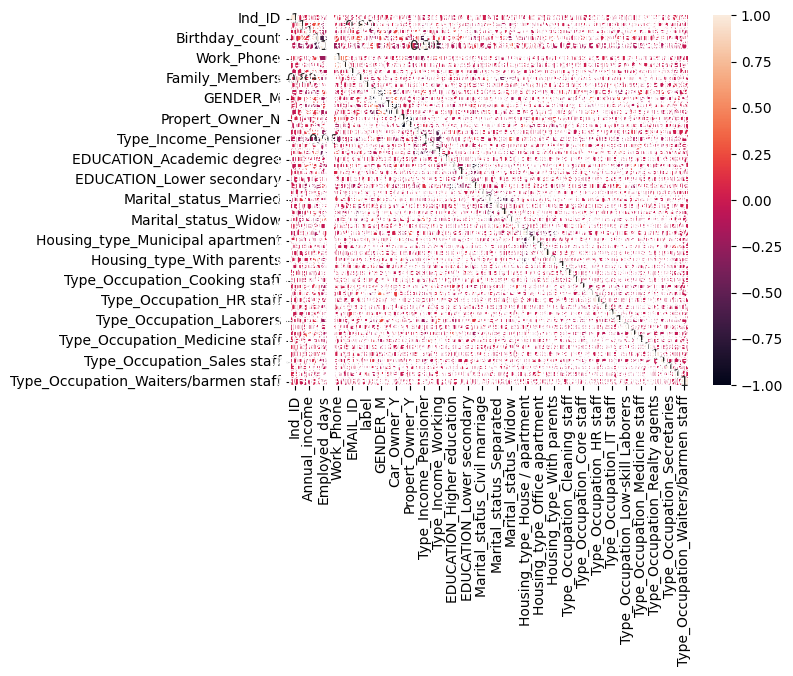

In [388]:
sns.heatmap(df_encoded.corr(), annot=True)

In [389]:
df_encoded.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label', 'GENDER_F', 'GENDER_M', 'Car_Owner_N',
       'Car_Owner_Y', 'Propert_Owner_N', 'Propert_Owner_Y',
       'Type_Income_Commercial associate', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'EDUCATION_Academic degree', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Type_Occupation_Accountants'

Accuracy Score for Linear Regression Model:
0.7493016537139436


Predicted Y values:


Linear Regression Model Scatter Plot:


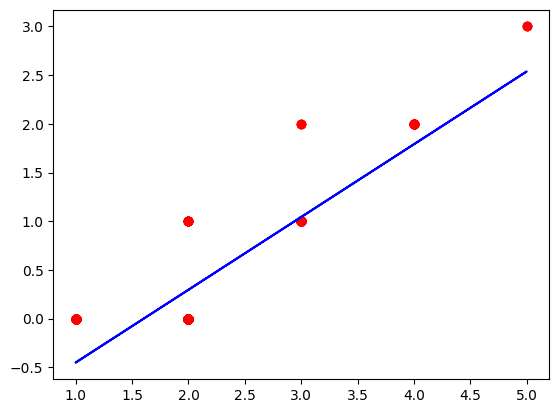

In [390]:
linear_df = df_encoded[['Family_Members','CHILDREN']]
X = np.array(linear_df['Family_Members']).reshape(-1,1)

y = np.array(linear_df['CHILDREN']).reshape(-1,1)

X_train, X_test, y_train, y_test = begin_linear_regression(X, y)

### Model Observations
The model perfomed very well. Linear Regression worked for this dataset because the accuracy score is close to 1. When you multiply the accuracy score by 100, you get a value of 74.9 which is basically 75%. For most industries, this is a fine/good accuracy score to hsve which makes the data quite reliable. Linear Regression could be a good approach for this dataset because when looking at the graph, there is a strong positive correlation with the variables chosen and it seems that more family members leads to more children

### 3.

In [391]:
begin_knn_classifier(X_train, X_test, y_train, y_test)

0.9655913978494624
[0 0 1 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 0 2 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 2 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 2 2 0 0 0 0 2 0 0 0 1 0 0 1 1 0 1 0 0 0 2 0 1 0 1 1 0 0 0 0 1 0 0 1 2
 0 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 2 1 0 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0 0 2 0 1
 2 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 1 0 1 0 2 0
 2 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 0 0 1 2 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 1
 0 1 0 0 0 2 1 0 0 0 0 2 0 0 0 1 0 1 2 0 0 0 1 0 2 0 0 3 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 1 0 1 0 3 0 1 2 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


/opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [392]:

# print(knn.score(X_test, y_test))

In [393]:
from sklearn.metrics import accuracy_score

def find_optimal_k(X_train, y_train, X_test, y_test, max_k=20):
    k = 1
    acc = 0

    for m in range(1, max_k+1):
        i = KNeighborsClassifier(n_neighbors=k)
        i.fit(X_train, y_train)
        a = i.predict(X_test)
        b = accuracy_score(y_test, y_pred)

        if b > acc:
            k = m
            acc = b
    
    return k, acc   

### Model Observations
My optimal k score is 13. My code above displays how I got this. KNN performed very well for this dataset since the accuracy score generated is around 0.96 rounded, which multiplied by 100 is about 97%. This is very close to 1 which thus, makes the data seen through KNN very reliable. 

### 4.

In [394]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

logistic_df = df_encoded[['Family_Members','CHILDREN']]
X = np.array(logistic_df['Family_Members']).reshape(-1,1)

y = np.array(logistic_df['CHILDREN']).reshape(-1,1)

logistic_regression(X,y)

Accuracy Score for Logistic Regression Model:
0.9591397849462365


Predicte Y values:
[0 0 1 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 0 2 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 2 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 2 2 0 0 0 0 2 0 0 0 1 0 0 1 1 0 1 0 0 0 2 0 1 0 1 1 0 0 0 0 1 0 0 1 2
 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 2 1 0 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0 0 2 0 1
 2 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 1 0 1 0 2 0
 2 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 0 0 1 2 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 1
 0 1 0 0 0 2 1 0 0 0 0 2 0 0 0 1 0 1 2 0 0 0 1 0 2 0 0 2 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 1 0 1 0 2 0 1 2 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0

/opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was pa

### Model Obervations
Logistic Regression performed very well for this dataset. The accuracy score is about 96%. This is very close to 1 which makes this model very reliable in predictin

### 5.

In [395]:
from sklearn import preprocessing

In [396]:
df_max_scaled = df_encoded.copy()

In [397]:
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()

display(df_max_scaled)
merge_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Occupation_Accountants,Type_Occupation_Cleaning staff,Type_Occupation_Cooking staff,Type_Occupation_Core staff,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,0.972510,0.000000,0.114286,-0.752505,1.000000,1.0,0.0,0.0,0.0,0.133333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.972688,0.000000,0.200000,-0.543454,-0.001604,1.0,1.0,1.0,0.0,0.133333,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.972688,0.000000,0.200000,NaN,-0.001604,1.0,1.0,1.0,0.0,0.133333,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.972689,0.000000,NaN,-0.543454,-0.001604,1.0,1.0,1.0,0.0,0.133333,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.972690,0.000000,0.200000,-0.543454,-0.001604,1.0,1.0,1.0,0.0,0.133333,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0.976358,0.000000,NaN,-0.479315,-0.005974,1.0,0.0,0.0,0.0,0.133333,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1544,0.975389,0.000000,0.142857,-0.410046,-0.003310,1.0,0.0,0.0,0.0,0.066667,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1545,0.993317,0.142857,0.114286,-0.528101,-0.006782,1.0,0.0,0.0,0.0,0.266667,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1546,0.993749,0.000000,0.171429,-0.613004,-0.001766,1.0,1.0,1.0,0.0,0.133333,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


### Model Performance (5.)
After running normalization on my models, I compared the accuracy scores for them. I did this by running my full code without the normalization functions and then running the whole code with them. For Linear Regression, there was no change before and after running my normalization code. In both instances, the accuracy score for Linear regression stayed the same: 0.7493016537139436. For KNN, there was also no change before and after running my normalization code. The accuracy score stayed the same: 0.9655913978494624. And finally, for Logistic Regression, no change was seen for this models accuracy score from before and after the normalization code was ran: 0.9591397849462365. My reasoning behind the accuracy score stayed the same for all three models is because their were lots of 0's and 1's in the dataset. This occured after we were asked to standradize the data. From looking at the dataset as a whole and considering my coding input, I'd say the best measure of performane for my dataset is the accuracy score. An accuracy score ensures that the information used is reliable and correct. It is measured by the degree of closeness between the data's representation and the actual events or objects it describes.